In [1]:
from os import path
import matplotlib.pyplot as plt
from mldecompose.molecular_inter import MolecularInteraction
from mldecompose import plot_util
rootfolder = '/home/yizaochen/codes/dna_rna/mldecompose_pnas16mer'

### Part 1: Read DataFrame

In [2]:
ml_arr = MolecularInteraction(rootfolder, 'arna+arna')
df_arr = ml_arr.read_df()
ml_bdd = MolecularInteraction(rootfolder, 'bdna+bdna')
df_bdd = ml_bdd.read_df()

In [3]:
df_arr.head()

,PP,st,PB,R,RB,bp,sum_selected_bonds,sum_of_central_basepairs,sum_of_all_basepairs,enm_lambda,qha_lambda
Mode,,,,,,,,,,,
Mode 1,0.000205,0.000653,0.000143,0.000036,0.000141,0.000207,0.001386,0.000678,0.000697,0.001393,0.001271
Mode 2,0.000303,0.000845,0.000199,0.000046,0.000184,0.000237,0.001814,0.000842,0.000912,0.001825,0.001577
Mode 3,0.000538,0.001842,0.000363,0.000084,0.000324,0.000324,0.003476,0.001213,0.001746,0.003492,0.002592
Mode 4,0.001295,0.001882,0.001146,0.000239,0.000378,0.001175,0.006115,0.002934,0.003134,0.006269,0.003866
Mode 5,0.001613,0.004672,0.001107,0.000295,0.000876,0.000950,0.009513,0.002404,0.004782,0.009564,0.005336


### Part 2: Process Data for plot

In [3]:
d_data = plot_util.get_d_data_twiststretch_coupling(ml_arr, ml_bdd)

### Part 3: Plot

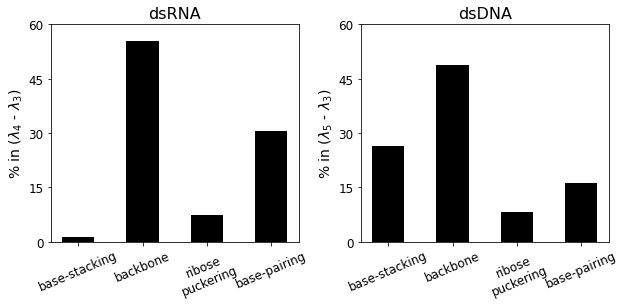

In [7]:
interaction_list_v1 = ['base-stacking', 'backbone', 'ribose\npuckering', 'base-pairing']
yticks = [0, 15, 30, 45, 60]
ylims = (0, 60)

hspace = 0
wspace = 0.25
fig = plt.figure(figsize=(10,4))
d_axes = plot_util.get_daxes_twiststretch_coupling(fig, hspace, wspace)
xlist = range(4)
w = 0.5
lbfz = 14
tick_lbfz = 12
ttfz = 16

key1 = 'left'
ax = d_axes[key1]
yarray = plot_util.d_data_to_yarray_twiststretch(d_data, key1)
ax.bar(xlist, yarray, w, color='black')
ax.set_xticks(xlist)
ax.set_xticklabels(interaction_list_v1)
ax.set_yticks(yticks)
ax.set_ylim(ylims)
ylabel = plot_util.get_ylabel_twiststretch(4, 3)
ax.set_ylabel(ylabel, fontsize=lbfz)
ax.set_title('dsRNA', fontsize=ttfz)
ax.tick_params(axis='y', labelsize=tick_lbfz)
ax.tick_params(axis='x', labelsize=tick_lbfz, labelrotation=23)

key1 = 'right'
ax = d_axes[key1]
yarray = plot_util.d_data_to_yarray_twiststretch(d_data, key1)
ax.bar(xlist, yarray, w, color='black')
ax.set_xticks(xlist)
ax.set_xticklabels(interaction_list_v1)
ax.set_yticks(yticks)
ax.set_ylim(ylims)
ylabel = plot_util.get_ylabel_twiststretch(5, 3)
ax.set_ylabel(ylabel, fontsize=lbfz)
ax.set_title('dsDNA', fontsize=ttfz)
ax.tick_params(axis='y', labelsize=tick_lbfz)
ax.tick_params(axis='x', labelsize=tick_lbfz, labelrotation=23)

plt.savefig('twist_stretch_ml_decompose.svg')
plt.show()